In [337]:
import numpy as np
from sklearn.cluster import k_means
import pickle
import pandas as pd
from sklearn.utils import shuffle
def read_part_data(part_name):
    dense_features = ['I' + str(i) for i in range(1, 14)]
    sparse_features = ['C' + str(i) for i in range(1, 27)]
    features = dense_features + sparse_features

    pkl_file = open('/data/LeiLixiang/pycharmproject/DeepCTR-Torch/data/features_min.pkl', 'rb')
    features_min = pickle.load(pkl_file)

    x_npy = np.load('/data/LeiLixiang/pycharmproject/Fi_GNN/data/Criteo/'+part_name+'/train_x2.npy')
    x = pd.DataFrame(x_npy, columns=features)
    index_npy = np.load('/data/LeiLixiang/pycharmproject/Fi_GNN/data/Criteo/'+part_name+'/train_i.npy')
    index = pd.DataFrame(index_npy, columns=features)
    y_npy = np.load('/data/LeiLixiang/pycharmproject/Fi_GNN/data/Criteo/'+part_name+'/train_y.npy')
    y = pd.DataFrame(y_npy, columns=['label'])

    x = pd.concat([x[dense_features], index[sparse_features]], axis=1)

    for feat in sparse_features:
        x[feat] -= features_min[feat]

    return pd.concat([x, y], axis=1)

def load_embeddings(filed_name):
    embedding = np.load('./{}_tsne.npy'.format(filed_name))
    embedding_ori = np.load('./{}.npy'.format(filed_name))
    return embedding, embedding_ori

def get_counts(filed_name):
    data = read_part_data('part2')
    counts = data[filed_name].value_counts().sort_index()
    return counts

def get_color(counts,feat_num, num):
    tmp = counts>num
    result = [False for i in range(feat_num)]
    for i, v in tmp.items():
        result[i] = v
    return result

def get_color2(counts,feat_num, num1, num2):
    tmp = (counts>num1)&(counts<num2)
    result = [False for i in range(feat_num)]
    for i, v in tmp.items():
        result[i] = v
    return result

In [230]:
embedding_ori.shape

(172322, 16)

In [234]:
embedding, embedding_ori = load_embeddings('C21')
counts = get_counts('C21')

In [338]:
color = get_color(counts,embedding.shape[0],1000)
color_f = [not i for i in color]
# embedding, color = shuffle(embedding, color)

In [467]:
color = get_color2(counts,embedding.shape[0],50,100)
more_embedding = shuffle(embedding[color])[0:1000,]

In [265]:
# more_embedding = embedding[color]
more_embedding = shuffle(embedding[color_f])[0:1000,]

In [350]:
more_embedding = shuffle(embedding[color])[0:1000,]

In [73]:
more_embedding, new_embedding_ori = shuffle(embedding[color], embedding_ori[color])
more_embedding = more_embedding[0:1000,]
new_embedding_ori = new_embedding_ori[0:1000,]

In [81]:
centroid, label, inertia = k_means(more_embedding, 10)

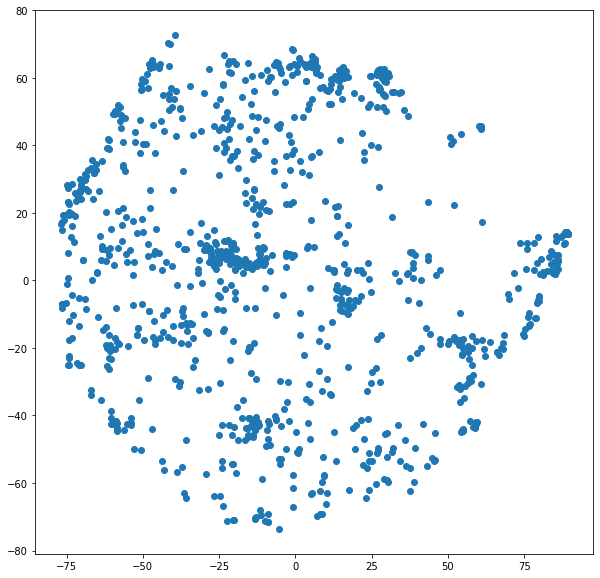

In [468]:
import matplotlib 
import matplotlib.pyplot as plt
# 保证图片在浏览器内正常显示
%matplotlib inline
plt.figure(figsize=(10,10))
# plt.scatter(more_embedding[:,0], more_embedding[:,1], c=label)
plt.scatter(more_embedding[:,0], more_embedding[:,1])
plt.show()


In [409]:
sum(color)

2741

In [247]:
groups = pd.cut(counts.tolist(),[-1,1,3,6,10,20,100,200,500,1000,1500,1000000])

In [248]:
bars = counts.groupby(groups).count()

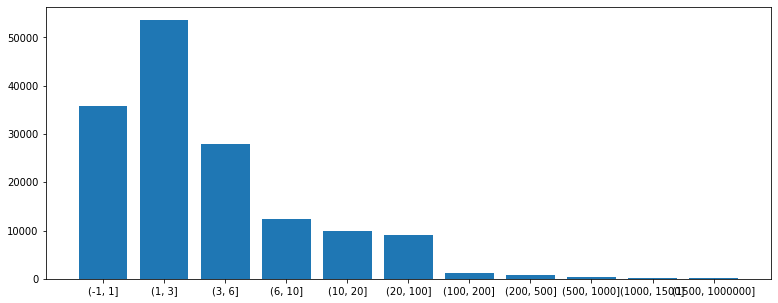

In [249]:
index = bars.index
name = []
for i in index:
    name.append(str(i))
plt.figure(figsize=(13,5))
plt.bar(name,bars.values.tolist())
plt.show()

In [383]:
counts_tmp = counts.sort_values()

In [384]:
counts_tmp

79278          1
42231          1
117958         1
42238          1
117949         1
           ...  
7          49278
8         100058
1         114113
2         156471
0         967841
Name: C21, Length: 151325, dtype: int64

In [400]:
feat_num = counts_tmp.shape[0]
interval = int(feat_num/10)+1
for i in range(10):
    print(range(i*interval,(i+1)*interval))
    feat = counts_tmp[i*int(feat_num/10):(i+1)*int(feat_num/10)]
    

range(0, 15133)
range(15133, 30266)
range(30266, 45399)
range(45399, 60532)
range(60532, 75665)
range(75665, 90798)
range(90798, 105931)
range(105931, 121064)
range(121064, 136197)
range(136197, 151330)


In [401]:
counts_tmp[136197:151330]

12919        16
7475         16
41834        16
24319        16
12880        16
          ...  
7         49278
8        100058
1        114113
2        156471
0        967841
Name: C21, Length: 15128, dtype: int64